In [2]:
import pandas as pd
import random
import matplotlib.pyplot as plt 
import numpy as np 
from visibility_graph import visibility_graph
import networkx as nx
import statsmodels.api as sm
import os

ruta = '../Flare/'

edge = '../Flare/edgeList/'

if not os.path.exists(ruta):
    os.makedirs(ruta)
    
if not os.path.exists(edge):
    os.makedirs(edge)

In [3]:
def lista0 (lista1, lista2):
    while 0 in lista1:
        lista2.pop(lista1.index(0))
        lista1.remove(0)
    return lista1, lista2 

def get_alpha(route,id, li_fit, ls_fit, xlimi, xlims, color, name):
    
    data = f'{route}{id}'
    routeSaved = f'{route}pdf/'

    if not os.path.exists(routeSaved):
        os.makedirs(routeSaved)

    #manejo del grafo y grados.
    G = nx.read_edgelist(data,nodetype=int) # leemos el grafo
    degree_count =  nx.degree_histogram(G) 
    degrees = list(range(0, len(degree_count)))

    degree_count, degrees = lista0(degree_count, degrees)
    
    #Normalize the degree distribution
    degree_distribution = [count/float(sum(degree_count)) for count in degree_count]
    x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))
    x,y=x0[(x0>=li_fit)&(x0<=ls_fit)],y0[(x0>=li_fit)&(x0<=ls_fit)]


    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()

    # Plot degree distribution
    a=np.linspace(li_fit,ls_fit,10)
    

    plt.figure(figsize=(6,4))
    plt.plot(x0,y0,color=color,linewidth=0,marker="P",markersize=5,label="data")
    plt.plot(a,(a)*(model.params[1])+model.params[0]*1.,color="k",lw=3,label=r"fit ($\alpha_0={}$)".format(-np.round(model.params[1],2)))
    plt.xlabel(r'$\log_{10}(k)$ (Degree)'); plt.ylabel(r'$\log_{10} P(k)$'); plt.title('Degree Distribution {}'.format(name)); plt.legend(); plt.xlim(xlimi,xlims)
    plt.legend(title=r"$P(k)\sim x^{-\alpha_0}$"); plt.grid(alpha=0.5)
    plt.savefig(routeSaved+f'{id}.pdf',dpi=400,bbox_inches='tight')
    plt.show()

    return

In [4]:
flare = pd.read_csv('../transients/Flare.csv')
flare


,Classification,ID,observation_id,Mag,Magerr,MJD
0,Flare,1211131320034233281,9380,18.6006,0.138104,54452.152868
1,Flare,1211131320034233281,9379,18.7354,0.146056,54452.146371
2,Flare,1211131320034233281,9378,18.5499,0.135435,54452.139895
3,Flare,1211131320034233281,9377,15.9052,0.064506,54003.245989
4,Flare,1211131320034233281,9376,15.9410,0.064964,54003.237835
...,...,...,...,...,...,...
21212,Flare,1505121180464109343,138153,18.5787,0.137524,55501.492099
21213,Flare,1505121180464109343,138152,18.2738,0.150056,55341.165719
21214,Flare,1505121180464109343,138122,18.5708,0.158313,55545.356086
21215,Flare,1505121180464109343,138157,18.5821,0.138324,55510.478850


In [5]:
ids = list(flare['ID'].unique())
print(len(list(flare['ID'].unique())))
flare['ID'].unique()

59


array([1211131320034233281, 1201251260114103174, 1201141120454117896,
       1006181091244116352, 1202271090564148720, 1104041180464131580,
       1204111180464108242, 1109260070234114098, 1201301180224121978,
       1209141181134129658, 1107031350754120112, 1201271040284172041,
       1105261210664103986, 1206221121184125294, 1201301180554121756,
       1011101120514117494, 1210081290084113755, 1302181430344101379,
       1312241260414106473, 1312251150554112896, 1406281150734103537,
       1601311460284115377, 1512161181174138560,  906221151194126593,
       1611101400424116462, 1205161380684113569, 1212031040274125613,
       1112310010184138365, 1110241430314158229, 1301131010554139998,
       1010291040204101820, 1109291090214135845, 1202251040774141275,
       1001081010294126339, 1306071320794125262, 1306161290784123559,
       1304111230414140313, 1609251231144129676, 1304121230614134803,
       1607041211134127847, 1502251150564130121, 1604151230814108369,
       1602271120454

##### Función para hacer los datos

In [6]:
#funcion que haga eso de forma automatica

def edgelist(id):
    vec_id = flare[flare['ID'] == id]['Mag']
    graph_id = visibility_graph(vec_id)
    nx.write_edgelist(graph_id, f'{ruta}edgeList/{id}')


In [8]:
def get_alpha_data(route,id, li_fit, ls_fit, name):
    
    data = f'{edge}{id}'
    
    #manejo del grafo y grados.
    G = nx.read_edgelist(data,nodetype=int) # leemos el grafo
    degree_count =  nx.degree_histogram(G) 
    degrees = list(range(0, len(degree_count)))

    degree_count, degrees = lista0(degree_count, degrees)
    
    #Normalize the degree distribution
    degree_distribution = [count/float(sum(degree_count)) for count in degree_count]
    x0,y0=np.array(np.log10(degrees)),np.array(np.log10(degree_distribution))
    x,y=x0[(x0>=li_fit)&(x0<=ls_fit)],y0[(x0>=li_fit)&(x0<=ls_fit)]


    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()

    alpha = -np.round(model.params[1],2)
    values = [name,id,alpha]
    
    return values

In [11]:
values = []
for id in ids:
    values.append(get_alpha_data(edge, id, 0.789, 1.369, 'Flare')) 

print(values)

[['Flare', 1211131320034233281, 2.68], ['Flare', 1201251260114103174, 2.48], ['Flare', 1201141120454117896, 2.32], ['Flare', 1006181091244116352, 2.42], ['Flare', 1202271090564148720, 2.51], ['Flare', 1104041180464131580, 2.86], ['Flare', 1204111180464108242, 2.88], ['Flare', 1109260070234114098, 2.42], ['Flare', 1201301180224121978, 2.52], ['Flare', 1209141181134129658, 2.36], ['Flare', 1107031350754120112, 2.25], ['Flare', 1201271040284172041, 2.94], ['Flare', 1105261210664103986, 1.8], ['Flare', 1206221121184125294, 2.69], ['Flare', 1201301180554121756, 2.72], ['Flare', 1011101120514117494, 2.75], ['Flare', 1210081290084113755, 2.34], ['Flare', 1302181430344101379, 2.69], ['Flare', 1312241260414106473, 1.98], ['Flare', 1312251150554112896, 2.54], ['Flare', 1406281150734103537, 2.51], ['Flare', 1601311460284115377, 2.73], ['Flare', 1512161181174138560, 2.67], ['Flare', 906221151194126593, 2.29], ['Flare', 1611101400424116462, 2.68], ['Flare', 1205161380684113569, 2.72], ['Flare', 121

In [12]:
import csv 

ruta = '../resultados/prueba.csv'

with open (ruta, mode = 'a', newline = '') as archivo: 
    writer = csv.writer(archivo)

    writer.writerows(values)
    pass

#### Indices de los id's a probar (sacado aleatoreamente)

id1: 11

id2: 32

id3: 44

id4: 35

id5: 42

In [10]:
ids_group = [1205161380684113569, 1010291040204101820, 1303141290134114251, 1606160041184142245, 1312021180214101950,
              1011101120514117494, 1406281150734103537, 1607041211134127847, 909281320154111937, 1611101400424116462,
                1511141320394124088, 906221151194126593, 1505011120834122816, 1104041180464131580, 1410011070104121118]


""" 
id1 = 1201271040284172041
id2 = 1202251040774141275
id3 = 1304031120774114435
id4 = 1306161290784123559
id5 = 1602271120454112778


edgelist(id1)
edgelist(id2)
edgelist(id3)
edgelist(id4)
edgelist(id5)

#TODO: Realizar las pruebas de la 2 en adelante """

for _ in ids:
    edgelist(_)

In [11]:
values_min = [0.86, 0.89, 0.82, 0.71, 0.73, 0.79, 0.70, 0.770, 0.77, 0.80, 0.74, 0.80, 0.81, 0.91, 0.74]
values_max = [1.35, 1.34, 1.30, 1.41, 1.40, 1.40, 1.37, 1.385, 1.42, 1.26, 1.37, 1.41, 1.39, 1.39, 1.34]
values_alpha = [2.78, 2.85, 3.34, 2.45, 2.4, 2.78, 2.44, 2.56, 2.46, 3.37, 2.98, 2.37, 2.58, 3.05, 2.65]
print(len(values_alpha))

15


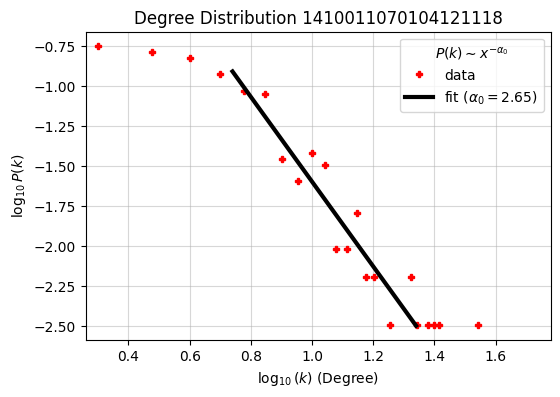

In [12]:
get_alpha(ruta, ids_group[14], 0.74, 1.34,0.26,1.78, "red", ids_group[14])

#### PRUEBA 1 $\rightarrow$ Flare

ID: 1201271040284172041

In [13]:
#0.85 & 1.34 -> 3.0
#0.76 & 1.45 -> 2.16

# get_alpha(ruta, id1, 0.76 ,1.33,0.26,1.78, "red", id1)


#### PRUEBA 2 $\rightarrow$ Flare

ID: 1202251040774141275

In [14]:
#0.85 & 1.34 -> 3.0
#0.76 & 1.45 -> 2.16

# get_alpha(ruta, id2, 0.76 ,1.38,0.26,1.78, "red", id2)


#### PRUEBA 3 $\rightarrow$ Flare

ID: 1304031120774114435

In [15]:
#0.85 & 1.34 -> 3.0
#0.76 & 1.45 -> 2.16

# get_alpha(ruta, id3, 0.76 ,1.41,0.26,1.78, "red", id3)


#### PRUEBA 4 $\rightarrow$ Flare

ID: 1306161290784123559

In [16]:
#0.85 & 1.34 -> 3.0
#0.76 & 1.45 -> 2.16

# get_alpha(ruta, id4, 0.76 ,1.31,0.26,1.78, "red", id4)


#### PRUEBA 5 $\rightarrow$ Flare

ID: 1602271120454112778

In [17]:
#0.85 & 1.34 -> 3.0
#0.76 & 1.45 -> 2.16

# get_alpha(ruta, id5, 0.76 ,1.37,0.26,1.78, "red", id5)
